# Week 3: Classification Homework

In [1]:
import pandas as pd

df = pd.read_csv("housing.csv")

## Features

In [2]:
df = df[[
    "latitude",
    "longitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value",
    "ocean_proximity",
]]

df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Preparation

In [3]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

## Question 1

What is the mode of `ocean_proximity`?

In [4]:
df["ocean_proximity"].mode().squeeze()

'<1H OCEAN'

## Question 2

In [5]:
corr = df.corr()
corr

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,-0.066983,0.069608,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,-0.108785,0.099773,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


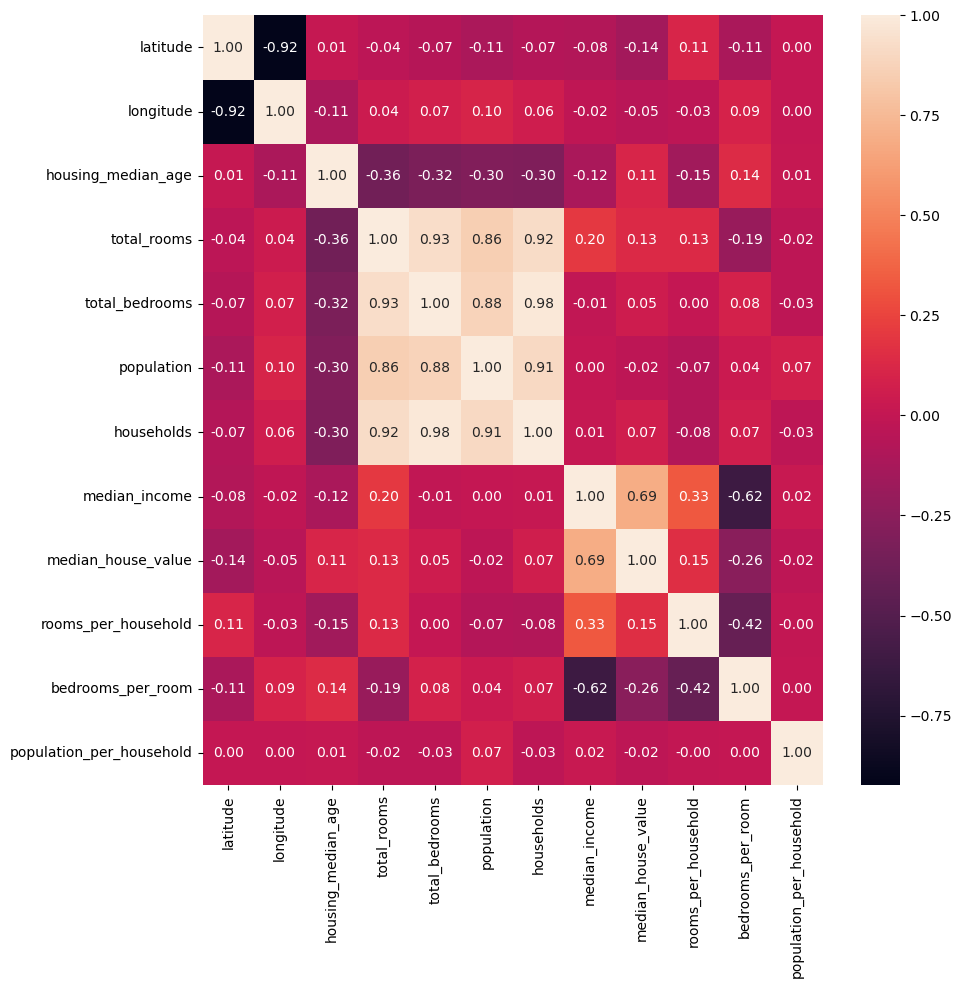

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f");

We can see visually that `households` and `total_bedrooms` are the pair of variables with the highest correlation

## Make `median_house_value` binary

Create a variable `above_average` which is 1 when `median_house_value` is above its mean and 0 otherwise

In [7]:
above_average = (df["median_house_value"] > df["median_house_value"].mean()).astype(int)

## Split Data

Make a train/val/test split of 60%/20%/20% using scikit learn and a random seed of 42. Make sore to exclude the target variable `median_house_value` from the dataset 

In [8]:
from sklearn.model_selection import train_test_split


df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=42)

y_train = (df_train["median_house_value"] > df_train["median_house_value"].mean()).astype(int)
y_val = (df_val["median_house_value"] > df_val["median_house_value"].mean()).astype(int)
y_test = (df_test["median_house_value"] > df_test["median_house_value"].mean()).astype(int)

del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

## Question 3

Find the mutual information score of the binarized variable (`above_average`) with the catergorical variable in the dataset (`ocean_proximity`)

In [9]:
from sklearn.metrics import mutual_info_score


mi_score = mutual_info_score(y_train, df_train["ocean_proximity"])
print(f"{mi_score=:.2f}")

mi_score=0.10


## Question 4

Fit a linear regression, using one hot encoding for `ocean_proximity`

### One Hot Encoding

Using scikit-learn `DictVectorizer`

In [10]:
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train.to_dict(orient="records")
val_dict = df_val.to_dict(orient="records")
test_dict = df_test.to_dict(orient="records")

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [11]:
dict(zip(dv.get_feature_names_out(), X_train[1,:]))

{'bedrooms_per_room': 0.24671497969260173,
 'households': 1232.0,
 'housing_median_age': 11.0,
 'latitude': 33.88,
 'longitude': -116.36,
 'median_income': 1.7844,
 'ocean_proximity=<1H OCEAN': 0.0,
 'ocean_proximity=INLAND': 1.0,
 'ocean_proximity=ISLAND': 0.0,
 'ocean_proximity=NEAR BAY': 0.0,
 'ocean_proximity=NEAR OCEAN': 0.0,
 'population': 2453.0,
 'population_per_household': 1.9910714285714286,
 'rooms_per_household': 10.19237012987013,
 'total_bedrooms': 3098.0,
 'total_rooms': 12557.0}

### Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)

print(f"{val_acc=:.2f}")

val_acc=0.84


## Question 5

Use *feature elimination* technique to find the least useful feature:
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

In [13]:
scores = {}
for feature in df_train.columns:
    # exclude feature
    df_train_tmp = df_train.copy().drop(columns=feature)
    df_val_tmp = df_val.copy().drop(columns=feature)
    # one hot encoding
    dv = DictVectorizer(sparse=False)
    X_train_tmp = dv.fit_transform(df_train_tmp.to_dict(orient="records"))
    X_val_tmp = dv.transform(df_val_tmp.to_dict(orient="records"))
    # model training
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_tmp, y_train)
    # model evaluation
    y_pred = model.predict(X_val_tmp)
    acc = accuracy_score(y_val, y_pred)
    scores[feature] = abs(val_acc - acc)

sorted(scores.items(), key= lambda x: x[1], reverse=True)

[('median_income', 0.04844925674435674),
 ('ocean_proximity', 0.01871903101486505),
 ('population', 0.009543035419342982),
 ('longitude', 0.007707836300238524),
 ('housing_median_age', 0.00458799779776109),
 ('households', 0.003853918150119262),
 ('latitude', 0.002202238942925261),
 ('rooms_per_household', 0.002202238942925261),
 ('bedrooms_per_room', 0.001835199119104458),
 ('total_rooms', 0.0009175995595521735),
 ('total_bedrooms', 0.0009175995595521735),
 ('population_per_household', 0.0003670398238209138)]

## Question 6

Train a `Ridge` linear regression model, apply the logarithmic transformation to `median_house_value`. Try the following values for `alpha`: `[0, 0.01, 0.1, 1, 10]`

Which alpha led to the best RMSE on the validation set?

In [14]:
import numpy as np
from sklearn.linear_model import Ridge

def rmse(y_true, y_pred):
    return np.sqrt(
        np.mean(
            (y_true - y_pred) ** 2
        )
    )

# split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=42)

y_train = np.log1p(df_train["median_house_value"])
y_val = np.log1p(df_val["median_house_value"])
y_test = np.log1p(df_test["median_house_value"])

del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

# one hot encoding
train_dict = df_train.to_dict(orient="records")
val_dict = df_val.to_dict(orient="records")
test_dict = df_test.to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

# model selection
scores = {}
for a in (0, 0.01, 0.1, 1, 10):
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    score = rmse(y_val, y_pred)
    
    scores[a] = round(score, 3)

sorted(scores.items(), key= lambda x: x[1], reverse=True)

[(0, 0.527), (0.01, 0.527), (0.1, 0.527), (1, 0.527), (10, 0.527)]